# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

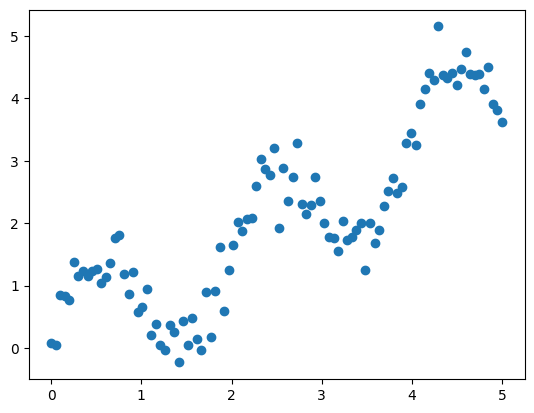

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5821099466773184


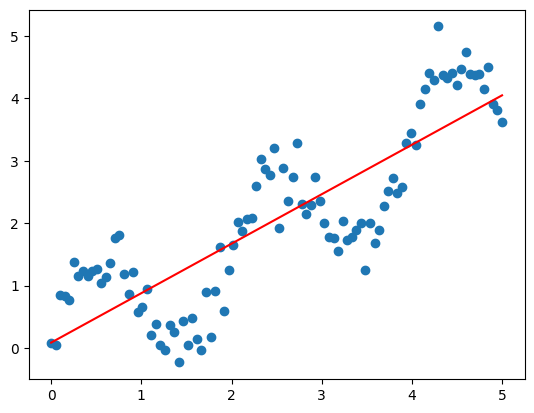

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [19]:
print(x.shape)

(100,)


In [20]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [21]:
regr_poly = LinearRegression()

In [22]:
regr_poly.fit(X_poly, y)

LinearRegression()

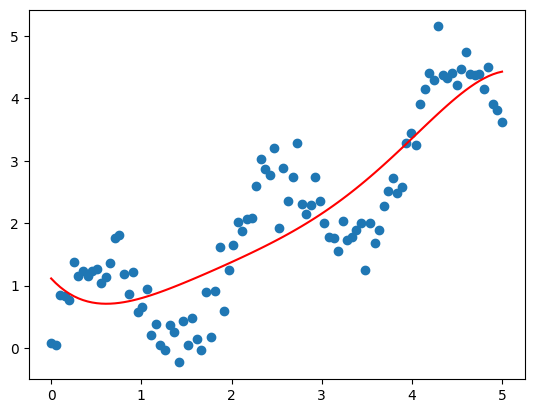

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [23]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.56395652  1.92376648 -0.8417574   0.18013045 -0.01418321]
interception:  1.1156139709601147


In [24]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.11561397, 1.04142606, 0.97641791, 0.91998037, 0.8715313 ,
       0.830515  , 0.79640169, 0.76868688, 0.74689089, 0.73055822,
       0.71925706, 0.71257867, 0.71013684, 0.71156735, 0.7165274 ,
       0.72469503, 0.7357686 , 0.74946618, 0.76552505, 0.78370109,
       0.80376825, 0.82551797, 0.84875865, 0.87331506, 0.8990278 ,
       0.92575273, 0.95336042, 0.98173558, 1.0107765 , 1.04039453,
       1.07051345, 1.10106896, 1.13200813, 1.16328879, 1.19487902,
       1.22675656, 1.25890828, 1.29132958, 1.32402387, 1.35700199,
       1.39028166, 1.4238869 , 1.45784751, 1.49219847, 1.5269794 ,
       1.56223402, 1.59800953, 1.63435612, 1.67132637, 1.70897471,
       1.74735685, 1.78652922, 1.82654841, 1.86747062, 1.90935109,
       1.95224356, 1.99619968, 2.04126848, 2.08749579, 2.13492369,
       2.18358996, 2.23352749, 2.28476376, 2.33732025, 2.39121191,
       2.44644655, 2.50302435, 2.56093724, 2.62016839, 2.68069159,
       2.74247076, 2.80545934, 2.86959976, 2.93482285, 3.00104

In [25]:
regr_poly.predict(X_poly)

array([1.11561397, 1.04142606, 0.97641791, 0.91998037, 0.8715313 ,
       0.830515  , 0.79640169, 0.76868688, 0.74689089, 0.73055822,
       0.71925706, 0.71257867, 0.71013684, 0.71156735, 0.7165274 ,
       0.72469503, 0.7357686 , 0.74946618, 0.76552505, 0.78370109,
       0.80376825, 0.82551797, 0.84875865, 0.87331506, 0.8990278 ,
       0.92575273, 0.95336042, 0.98173558, 1.0107765 , 1.04039453,
       1.07051345, 1.10106896, 1.13200813, 1.16328879, 1.19487902,
       1.22675656, 1.25890828, 1.29132958, 1.32402387, 1.35700199,
       1.39028166, 1.4238869 , 1.45784751, 1.49219847, 1.5269794 ,
       1.56223402, 1.59800953, 1.63435612, 1.67132637, 1.70897471,
       1.74735685, 1.78652922, 1.82654841, 1.86747062, 1.90935109,
       1.95224356, 1.99619968, 2.04126848, 2.08749579, 2.13492369,
       2.18358996, 2.23352749, 2.28476376, 2.33732025, 2.39121191,
       2.44644655, 2.50302435, 2.56093724, 2.62016839, 2.68069159,
       2.74247076, 2.80545934, 2.86959976, 2.93482285, 3.00104

In [26]:
mse = np.sum((regr_poly.predict(X_poly)-y)**2) / len(y)
print(mse)

0.47631551438617004


#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [27]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [29]:
sigma = 0.3

In [30]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [31]:
regr_rbf = LinearRegression()

In [32]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

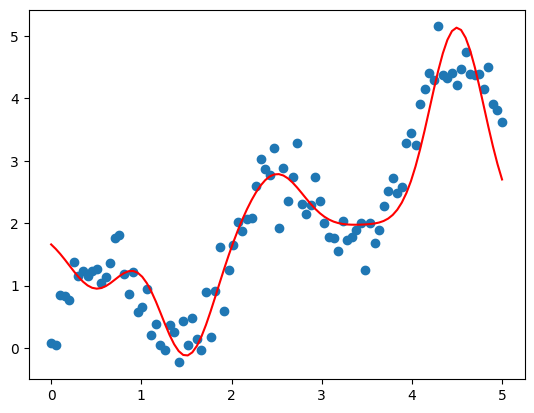

In [33]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [34]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.93374867 -2.01507672  0.90225909  0.07308752  3.24055757]
interception:  1.8936107166651628


#### Comparison

In [35]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

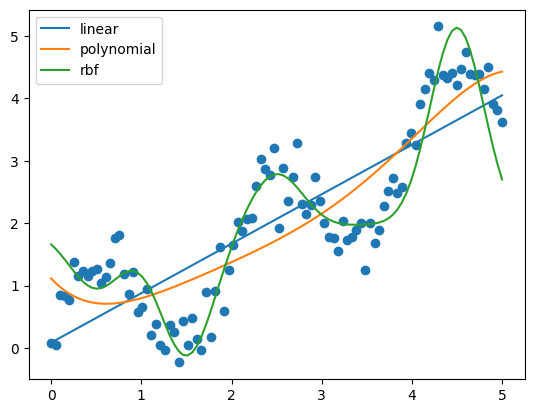

In [36]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [37]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5821099466773184


In [38]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.47631551438617004


In [39]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.23944902722947345
